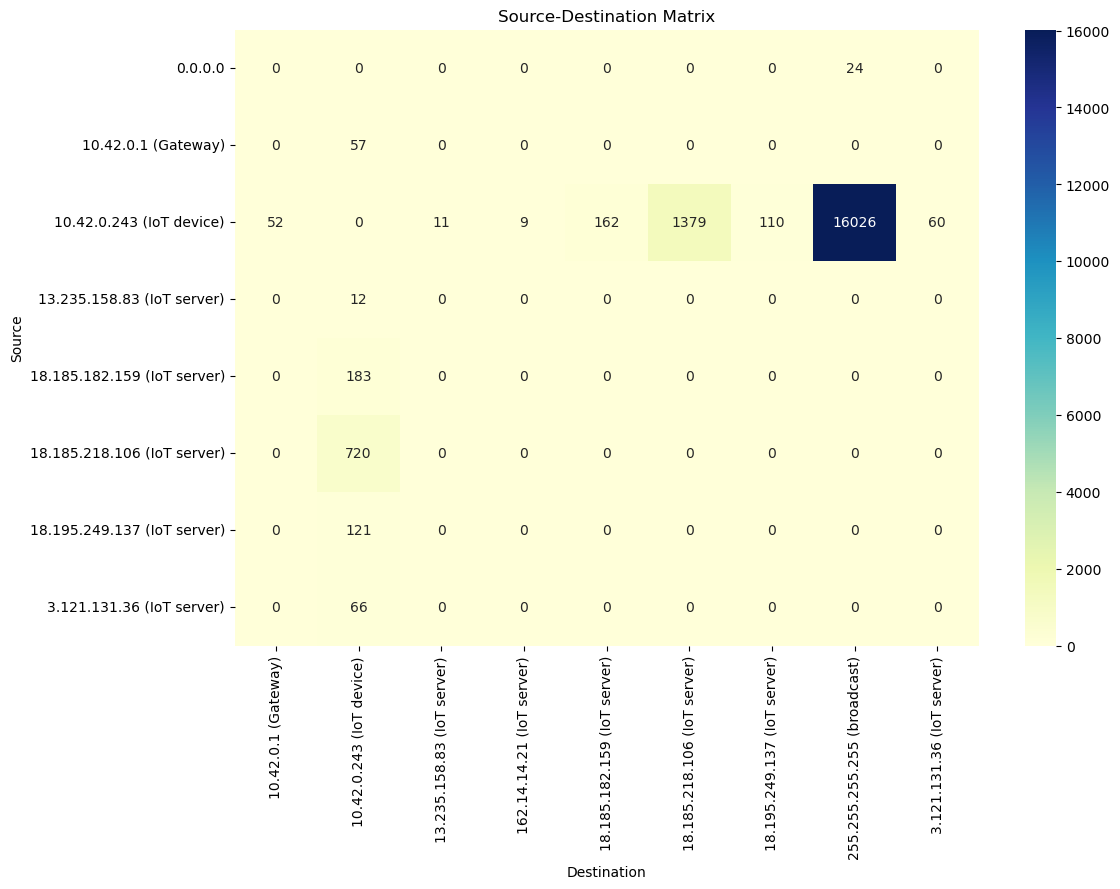

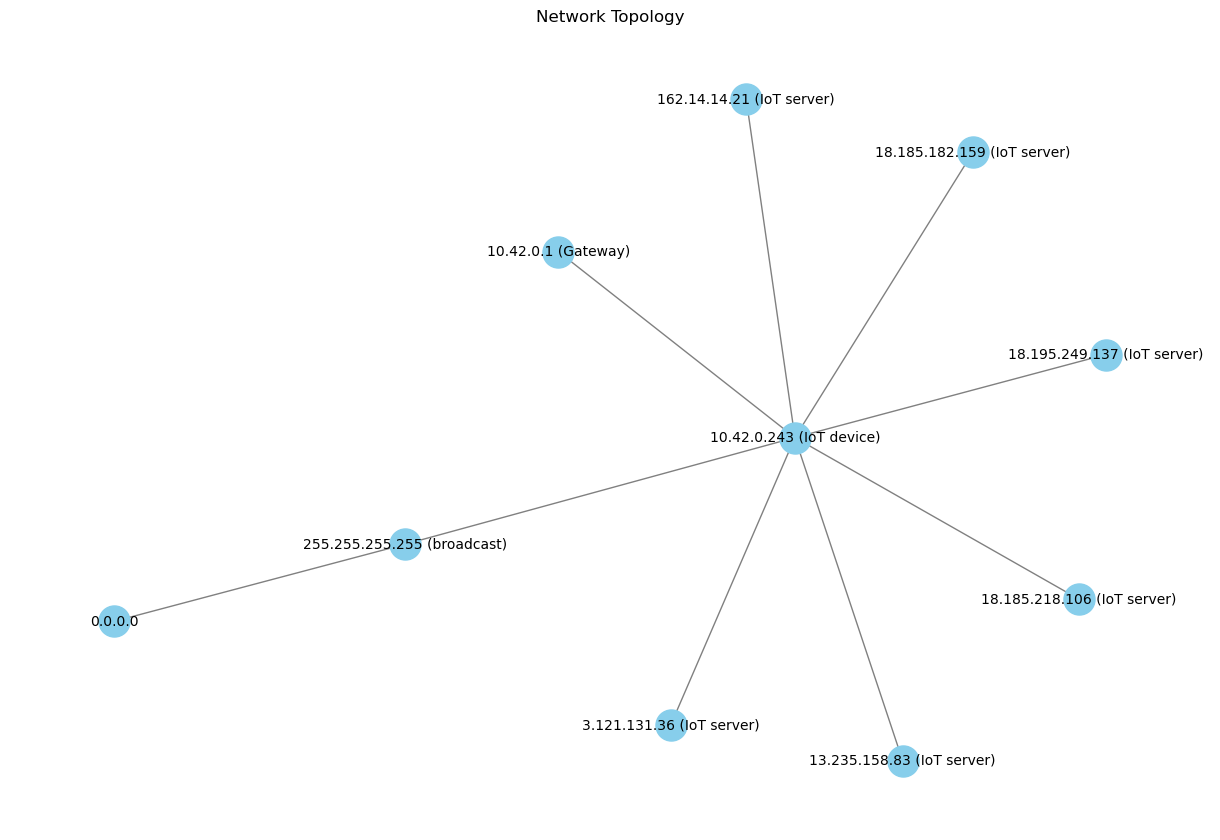

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import networkx as nx
from scapy.all import rdpcap, IP

# Function to analyze pcap file and create dataframes for plotting
def analyze_pcap(file_path):
    packets = rdpcap(file_path)
    
    # Create a dataframe to store source, destination, and packet count
    data = []

    for packet in packets:
        if IP in packet:
            src = packet[IP].src
            dst = packet[IP].dst
            data.append((src, dst))

    df = pd.DataFrame(data, columns=["Source", "Destination"])
    return df

# Function to add labels to IP addresses
def label_ip(ip):
    if ip == "10.42.0.243" or ip == "10.42.0.170":
        return f"{ip} (IoT device)"
    elif ip == "255.255.255.255":
        return f"{ip} (broadcast)"
    elif ip == "10.42.0.1":
        return f"{ip} (Gateway)"
    elif ip == "0.0.0.0":
        return ip
    else:
        return f"{ip} (IoT server)"

# Function to plot Source-Destination Matrix
def plot_source_destination_matrix(df):
    df_labeled = df.copy()
    df_labeled["Source"] = df_labeled["Source"].apply(label_ip)
    df_labeled["Destination"] = df_labeled["Destination"].apply(label_ip)
    
    matrix = df_labeled.pivot_table(index="Source", columns="Destination", aggfunc=len, fill_value=0)
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(matrix, annot=True, fmt="d", cmap="YlGnBu")
    plt.title("Source-Destination Matrix")
    plt.xlabel("Destination")
    plt.ylabel("Source")
    plt.show()

# Function to plot Network Topology
def plot_network_topology(df):
    G = nx.from_pandas_edgelist(df, source="Source", target="Destination")
    
    pos = nx.spring_layout(G)
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, labels={node: label_ip(node) for node in G.nodes()},
            node_size=500, node_color="skyblue", font_size=10, font_color="black", edge_color="gray")
    plt.title("Network Topology")
    plt.show()

# Main function
def main():
    file_path = "Calex Smart bulb files/Manual Analysis Pcaps/bulb-11_hours-idle.pcapng"  # Replace with the path to your pcap file
    df = analyze_pcap(file_path)
    
    plot_source_destination_matrix(df)
    plot_network_topology(df)

if __name__ == "__main__":
    main()


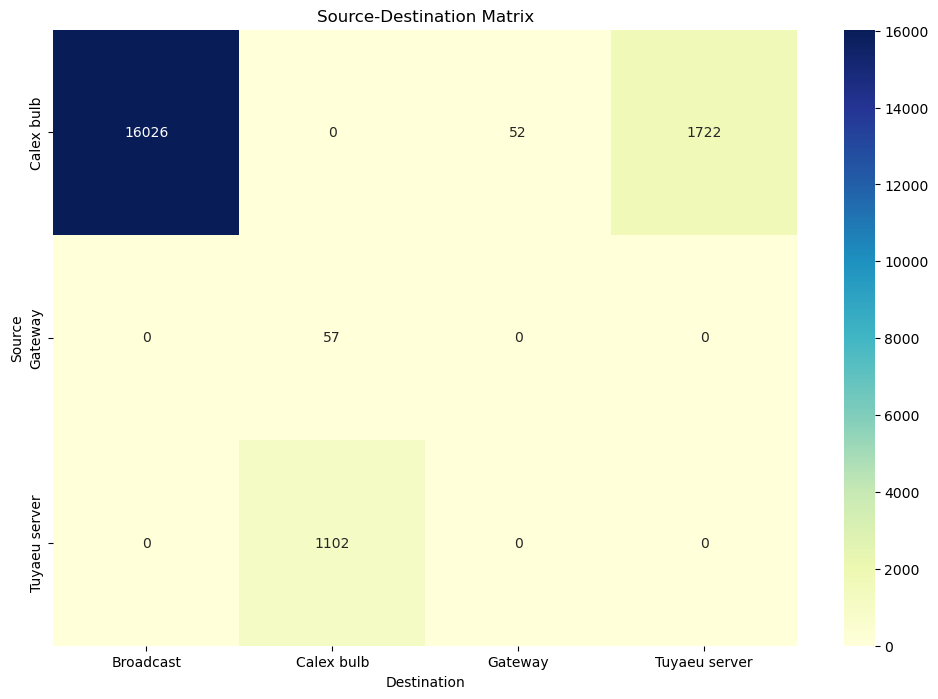

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import networkx as nx
from scapy.all import rdpcap, IP

# Function to analyze pcap file and create dataframes for plotting
def analyze_pcap(file_path):
    packets = rdpcap(file_path)
    
    # Create a dataframe to store source, destination, and packet count
    data = []

    for packet in packets:
        if IP in packet:
            src = packet[IP].src
            dst = packet[IP].dst
            data.append((src, dst))

    df = pd.DataFrame(data, columns=["Source", "Destination"])
    return df

# Function to add labels to IP addresses
def label_ip(ip):
    if ip == "10.42.0.243":
        return "Calex bulb"
    elif ip == "255.255.255.255":
        return "Broadcast"
    elif ip == "10.42.0.1" or ip == "192.168.137.1":
        return "Gateway"
    # elif ip == "192.168.137.255":
    #     return "NBNS/NetBIOS service"
    # elif ip.startswith("239.255"):
    #     return "SSDP/Service Discovery"
    elif ip == "192.168.137.126" or ip == "192.168.137.97":
        return "Tapo Plug"
    elif ip.startswith("52.") or ip.startswith("54.") or ip.startswith("34."):
        return "Tapo security/cloud server"
    elif ip.startswith("18.") or ip.startswith("13.") or ip.startswith("3."):
        return "Tuyaeu server"
    else:
        return ""

# Function to plot Source-Destination Matrix
def plot_source_destination_matrix(df):
    df_labeled = df.copy()
    df_labeled["Source"] = df_labeled["Source"].apply(label_ip)
    df_labeled["Destination"] = df_labeled["Destination"].apply(label_ip)
    
    # Filter out any rows where the label is empty
    df_labeled = df_labeled[(df_labeled["Source"] != "") & (df_labeled["Destination"] != "")]
    
    matrix = df_labeled.pivot_table(index="Source", columns="Destination", aggfunc=len, fill_value=0)
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(matrix, annot=True, fmt="d", cmap="YlGnBu")
    plt.title("Source-Destination Matrix")
    plt.xlabel("Destination")
    plt.ylabel("Source")
    plt.show()

# Function to plot Network Topology
def plot_network_topology(df):
    G = nx.from_pandas_edgelist(df, source="Source", target="Destination")
    
    pos = nx.spring_layout(G)
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, labels={node: label_ip(node) for node in G.nodes()},
            node_size=500, node_color="skyblue", font_size=10, font_color="black", edge_color="gray")
    plt.title("Network Topology")
    plt.show()

# Main function
def main():
    file_path = "Calex Smart bulb files/Manual Analysis Pcaps/bulb-11_hours-idle.pcapng"  # Replace with the path to your pcap file
    df = analyze_pcap(file_path)
    plot_source_destination_matrix(df)

    # plot_network_topology(df)

if __name__ == "__main__":
    main()


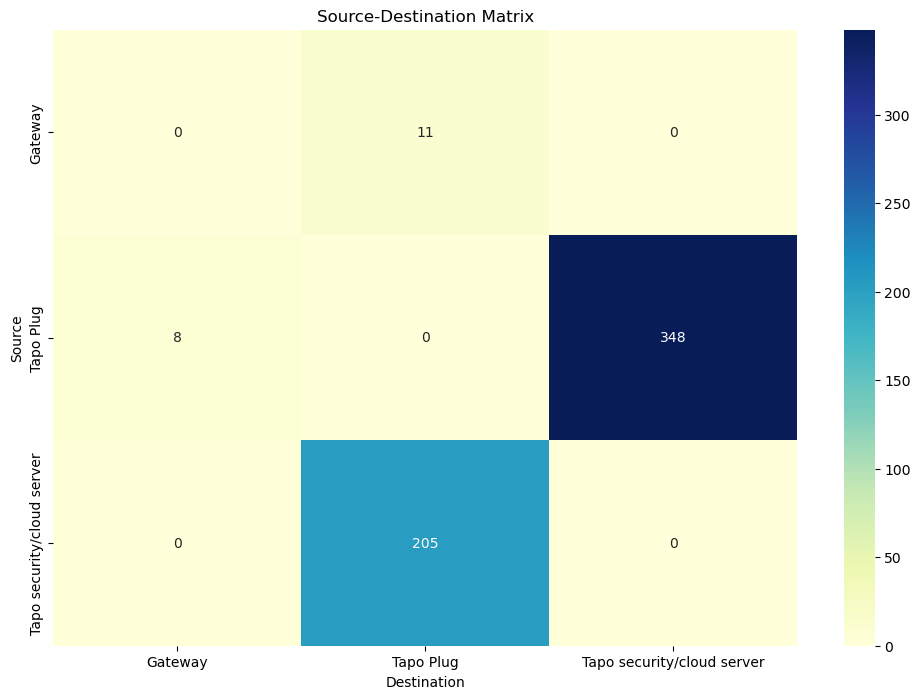

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import networkx as nx
from scapy.all import rdpcap, IP

# Function to analyze pcap file and create dataframes for plotting
def analyze_pcap(file_path):
    packets = rdpcap(file_path)
    
    # Create a dataframe to store source, destination, and packet count
    data = []

    for packet in packets:
        if IP in packet:
            src = packet[IP].src
            dst = packet[IP].dst
            data.append((src, dst))

    df = pd.DataFrame(data, columns=["Source", "Destination"])
    return df

# Function to add labels to IP addresses
def label_ip(ip):
    if ip == "10.42.0.243":
        return "Calex bulb"
    elif ip == "10.42.0.1" or ip == "192.168.137.1":
        return "Gateway"
    elif ip == "192.168.137.126" or ip == "192.168.137.97":
        return "Tapo Plug"
    elif ip.startswith("52.") or ip.startswith("54.") or ip.startswith("34."):
        return "Tapo security/cloud server"
    elif ip.startswith("18.") or ip.startswith("13.") or ip.startswith("3."):
        return "Tuyaeu server"
    else:
        return ""

# Function to plot Source-Destination Matrix
def plot_source_destination_matrix(df):
    df_labeled = df.copy()
    df_labeled["Source"] = df_labeled["Source"].apply(label_ip)
    df_labeled["Destination"] = df_labeled["Destination"].apply(label_ip)
    
    # Filter out any rows where the label is empty
    df_labeled = df_labeled[(df_labeled["Source"] != "") & (df_labeled["Destination"] != "")]
    
    matrix = df_labeled.pivot_table(index="Source", columns="Destination", aggfunc=len, fill_value=0)
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(matrix, annot=True, fmt="d", cmap="YlGnBu")
    plt.title("Source-Destination Matrix")
    plt.xlabel("Destination")
    plt.ylabel("Source")
    plt.show()

# Function to plot Network Topology
def plot_network_topology(df):
    G = nx.from_pandas_edgelist(df, source="Source", target="Destination")
    
    pos = nx.spring_layout(G)
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, labels={node: label_ip(node) for node in G.nodes()},
            node_size=500, node_color="skyblue", font_size=10, font_color="black", edge_color="gray")
    plt.title("Network Topology")
    plt.show()

# Main function
def main():
    file_path = "Tapo P100 Smart Plug files/Manual Analysis Pcaps/idle/idle_8_h.pcapng"  # Replace with the path to your pcap file
    df = analyze_pcap(file_path)
    plot_source_destination_matrix(df)
    # plot_network_topology(df)

if __name__ == "__main__":
    main()
